## Cargando el dataset

In [1]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
data, target = iris.data, iris.target

complete_dataframe = pd.concat((data, target.map(lambda i: iris.target_names[i])), axis=1)
complete_dataframe.sample(5, random_state=42)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
73,6.1,2.8,4.7,1.2,versicolor
18,5.7,3.8,1.7,0.3,setosa
118,7.7,2.6,6.9,2.3,virginica
78,6.0,2.9,4.5,1.5,versicolor
76,6.8,2.8,4.8,1.4,versicolor


### Estadísticas

In [2]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Visualización

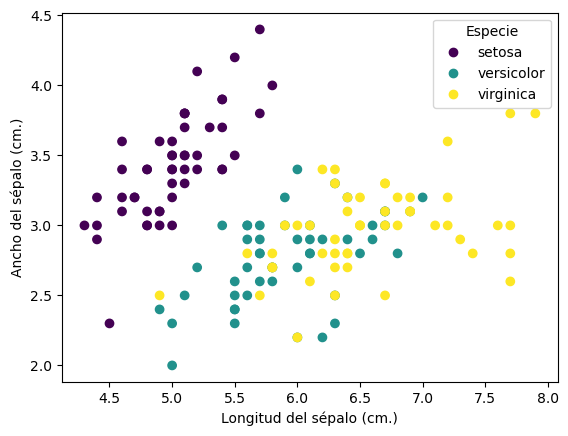

In [3]:
import matplotlib.pyplot as plt

figure = plt.scatter(data["sepal length (cm)"], data["sepal width (cm)"], c=target)
plt.legend(figure.legend_elements()[0], iris.target_names, title="Especie")
plt.xlabel("Longitud del sépalo (cm.)")
plt.ylabel("Ancho del sépalo (cm.)")

plt.show()

## Preprocesamiento

In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
X_processed = scaler.fit_transform(data)
y = target

## Entrenamiento

In [5]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=42)
model.fit(X_processed, y)
accuracy = model.score(X_processed, y)

print(f"Exactitud {accuracy * 100}%")

Exactitud 94.0%


## Evaluación

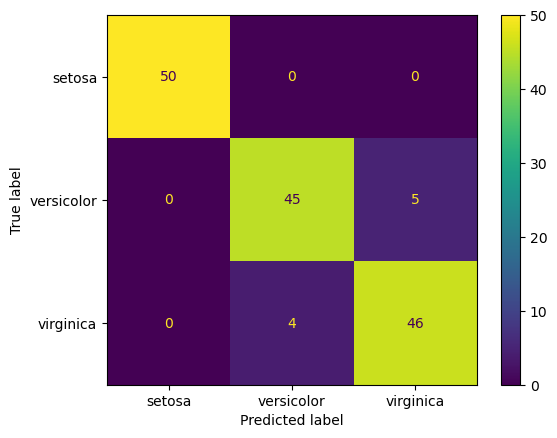

In [6]:
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = model.predict(X_processed)

ConfusionMatrixDisplay.from_predictions(y, y_pred, display_labels=iris.target_names)
plt.show()

## Exportar el modelo y el preprocesador

In [7]:
from joblib import dump

dump(scaler, "scaler.joblib")
dump(model, "model.joblib")

['model.joblib']